In [54]:
import pandas as pd
import numpy as np

In [55]:
df_fun=pd.read_excel("C:/Users/Admin/OneDrive/Desktop/Stock-quadrant-quantitative-analysis-using-deep-learning-classification/1.Final_file/2.Data_collection/stock_fun.xlsx")

In [56]:
df_tn=pd.read_excel("C:/Users/Admin/OneDrive/Desktop/Stock-quadrant-quantitative-analysis-using-deep-learning-classification/1.Final_file/2.Data_collection/stock_june2025_onwards.xlsx")

preparation data

In [57]:
print(df_tn.shape)
print(df_tn.isnull().sum())
print(df_tn.describe())

(69362, 8)
symbol         0
time           0
close_price    0
high_price     0
low_price      0
open_price     0
value          0
volume         0
dtype: int64
                                time   close_price    high_price  \
count                          69362  69362.000000  69362.000000   
mean   2025-08-01 21:57:51.906807552      9.963896     10.069459   
min              2025-06-04 00:00:00      0.010000      0.010000   
25%              2025-07-02 00:00:00      0.900000      0.910000   
50%              2025-08-01 00:00:00      2.680000      2.720000   
75%              2025-09-02 00:00:00      7.158460      7.250000   
max              2025-10-01 00:00:00    350.000000    360.000000   
std                              NaN     29.165057     29.381371   

          low_price    open_price          value        volume  
count  69362.000000  69362.000000   69362.000000  6.936200e+04  
mean       9.858781      9.962452       7.314754  5.693653e+06  
min        0.010000      0.01000

In [58]:
print(df_fun.shape)
print(df_fun.isnull().sum())
print(df_fun.describe())

(907, 7)
symbol           0
eps             64
pe              71
pbv              8
percentyield     7
volume           0
marketcap        0
dtype: int64
              eps            pe         pbv  percentyield        volume  \
count  843.000000    836.000000  899.000000    900.000000  9.070000e+02   
mean     0.416486     29.970897    1.181869      3.909367  4.594697e+06   
std      2.098391    455.065368    1.845644      3.944323  1.986407e+07   
min    -11.024490      0.000000    0.000000      0.000000  1.000000e+02   
25%     -0.008735      0.000000    0.490000      0.000000  4.120000e+04   
50%      0.070000      9.325000    0.770000      3.280000  3.178100e+05   
75%      0.277725     15.457500    1.280000      6.492500  2.076406e+06   
max     36.741980  13142.170000   33.130000     24.910000  4.516564e+08   

          marketcap  
count  9.070000e+02  
mean   4.609440e+07  
std    2.740798e+08  
min    1.800000e+02  
25%    8.427056e+04  
50%    5.555000e+05  
75%    4.324607

In [59]:
df_fun.dropna(inplace=True)

In [60]:
print(df_fun.isnull().sum())
print(df_fun.shape)

symbol          0
eps             0
pe              0
pbv             0
percentyield    0
volume          0
marketcap       0
dtype: int64
(836, 7)


data viz

เส้นค่าเฉลี่ยเคลื่อนที่แบบเอ็กซ์โพเนนเชียล (Exponential Moving Average - EMA)

คือเส้นค่าเฉลี่ยของราคาหุ้นย้อนหลังในระยะเวลาต่างๆ กัน (5, 15, 35, 89, และ 200 วัน) โดยให้ความสำคัญกับราคาล่าสุดมากกว่า เส้นเหล่านี้ช่วยบอกถึงแนวโน้มในระยะสั้นไปจนถึงระยะยาว

🔵 EMA5 = ระยะสั้น, สัญญาณไว

🟠 EMA15 = ระยะกลาง, ช่วยกรองสัญญาณ

🟢 EMA35 = แนวโน้มกลาง

🟣 EMA89 = แนวโน้มหลัก

🔴 EMA200 = แนวโน้มระยะยาว (เส้นใหญ่สุด)

In [61]:
import plotly.graph_objects as go

# 🔹 เลือกเฉพาะหุ้น 24CS
ohlc_df = df_tn[df_tn["symbol"] == "DELTA"].copy()

# 🔹 จัดการ index
ohlc_df["time"] = pd.to_datetime(ohlc_df["time"])
ohlc_df = ohlc_df.sort_values("time")
ohlc_df = ohlc_df.set_index("time")
ohlc_df.index.name = "Date"

# 🔹 Rename columns ให้ตรงกับ Plotly
ohlc_df = ohlc_df.rename(columns={
    "open_price": "Open",
    "high_price": "High",
    "low_price": "Low",
    "close_price": "Close",
    "volume": "Volume"
})

# 🔹 เลือกแค่ 200 วันล่าสุด (เพื่อดูง่าย)
ohlc_df = ohlc_df.tail(200)

# 🔹 คำนวณ EMA
for p in [5, 15, 35, 89, 200]:
    ohlc_df[f"EMA{p}"] = ohlc_df["Close"].ewm(span=p, adjust=False).mean()

# ✅ กราฟ Candlestick
fig = go.Figure(data=[go.Candlestick(
    x=ohlc_df.index,
    open=ohlc_df['Open'],
    high=ohlc_df['High'],
    low=ohlc_df['Low'],
    close=ohlc_df['Close'],
    name="Candlestick"
)])

# ✅ เส้น EMA
colors = {5:"blue", 15:"orange", 35:"green", 89:"purple", 200:"red"}
for p in [5, 15, 35, 89, 200]:
    fig.add_trace(go.Scatter(
        x=ohlc_df.index,
        y=ohlc_df[f"EMA{p}"],
        mode="lines",
        line=dict(width=2, color=colors[p]),
        name=f"EMA{p}"
    ))

# ✅ Volume
fig.add_trace(go.Bar(
    x=ohlc_df.index,
    y=ohlc_df['Volume'],
    name="Volume",
    marker_color="lightblue",
    opacity=0.5,
    yaxis="y2"
))

# ✅ Layout
fig.update_layout(
    title="DELTA Stock Candlestick Chart with EMA(5,15,35,89,200) and Volume",
    yaxis=dict(title="Price", domain=[0.3, 1]),
    yaxis2=dict(title="Volume", domain=[0, 0.25]),
    xaxis=dict(title="Date"),
    xaxis_rangeslider_visible=False,
    template="plotly_white",
    width=950,
    height=600
)

fig.show()


gruoping

In [62]:
import ta

def compute_technical_grades(df_candle, band_pct=0.015):
    df_result = []

    for symbol, df_sym in df_candle.groupby('symbol'):
        df_sym = df_sym.sort_values('time').copy()
        df_sym = df_sym.dropna(subset=['close_price'])  # ลบแถวที่ไม่มีราคา

        # ถ้าข้อมูลน้อยเกินไป ข้ามไป
        if len(df_sym) < 50:
            continue

        # คำนวณ EMA + RSI
        df_sym['ema5']   = df_sym['close_price'].ewm(span=5).mean()
        df_sym['ema15']  = df_sym['close_price'].ewm(span=15).mean()
        df_sym['ema35']  = df_sym['close_price'].ewm(span=35).mean()
        df_sym['ema89']  = df_sym['close_price'].ewm(span=89).mean()
        df_sym['ema200'] = df_sym['close_price'].ewm(span=200).mean()
        df_sym['rsi']    = ta.momentum.RSIIndicator(close=df_sym['close_price'], window=14).rsi()

        # ลบ NaN หลังคำนวณ indicator
        df_sym = df_sym.dropna(subset=['ema5','ema15','ema35','ema89','ema200','rsi'])
        if df_sym.empty:
            continue

        # ใช้ข้อมูลล่าสุด
        row = df_sym.iloc[-1]
        c, r = row['close_price'], row['rsi']
        e5, e15, e35, e89, e200 = row['ema5'], row['ema15'], row['ema35'], row['ema89'], row['ema200']

        # Logic grading
        if c >= e5 and r >= 70:
            grade = 'a'
        elif c >= e35 and e35 >= e89:
            grade = 'b'
        elif c >= e89 and (max([e5,e15,e35,e89]) - min([e5,e15,e35,e89])) / np.mean([e5,e15,e35,e89]) <= band_pct:
            grade = 'c'
        elif c < e89 and c < e200 and e89 < e200:
            grade = 'd'
        elif c < e5 < e15 < e35 < e89 < e200 and r <= 30:
            grade = 'e'
        else:
            grade = 'c'   # ตั้งค่า default

        df_result.append({
            'symbol': symbol,
            'time': row['time'],
            'close_price': row['close_price'],
            'high_price': row['high_price'],
            'low_price': row['low_price'],
            'open_price': row['open_price'],
            'value': row['value'],
            'trend_grade': grade,
        })

    return pd.DataFrame(df_result)


In [63]:
df_result = compute_technical_grades(df_tn)    

In [64]:
df_result.head(10)

,symbol,time,close_price,high_price,low_price,open_price,value,trend_grade
0,24CS,2025-10-01,1.14,1.14,1.13,1.13,43498,c
1,2S,2025-09-30,2.62,2.66,2.62,2.66,0,c
2,3BBIF,2025-09-30,6.50,6.60,6.45,6.60,0,b
3,A,2025-09-30,4.84,4.86,4.84,4.86,0,d
4,A5,2025-10-01,1.87,1.87,1.87,1.87,187,d
5,AAI,2025-09-30,4.90,5.00,4.90,4.90,0,b
6,AAV,2025-09-30,1.27,1.29,1.25,1.28,0,c
7,ABM,2025-09-30,0.81,0.85,0.81,0.84,0,b
8,ACC,2025-09-30,0.53,0.56,0.52,0.53,0,b
9,ACE,2025-09-30,1.31,1.31,1.29,1.30,0,b


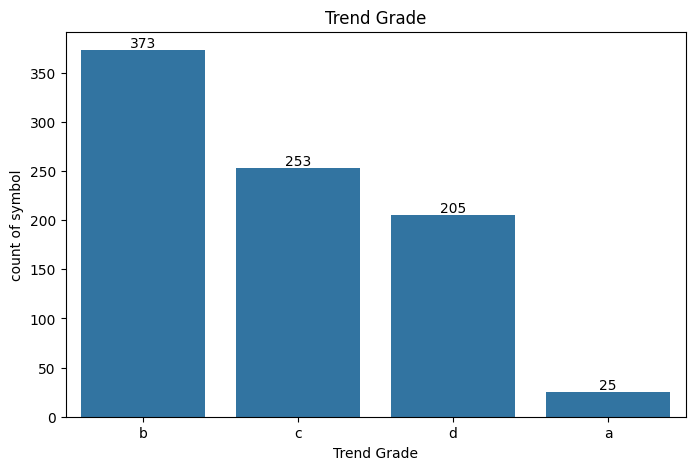

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_result, x="trend_grade", order=df_result["trend_grade"].value_counts().index)

plt.title("Trend Grade")
plt.xlabel("Trend Grade")
plt.ylabel("count of symbol")

# ✅ ใส่ตัวเลขบนแท่ง
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', fontsize=10
    )

plt.show()


# 📊 การแบ่งกลุ่มหุ้นตามปัจจัยพื้นฐาน (Fundamental Group)

การจัดกลุ่มหุ้นด้วยปัจจัยพื้นฐาน (Fundamental) ใช้ตัวชี้วัดทางการเงินหลัก 5 ตัว ได้แก่:

* **EPS (Earnings Per Share)** → กำไรต่อหุ้น ยิ่งสูงยิ่งดี
* **PE (Price-to-Earnings Ratio)** → ราคาหุ้นเทียบกับกำไร ยิ่งต่ำยิ่งดี
* **PBV (Price-to-Book Value Ratio)** → ราคาหุ้นเทียบกับมูลค่าทางบัญชี แสดงระดับการประเมินมูลค่า
* **Percent Yield (Dividend Yield)** → อัตราผลตอบแทนจากเงินปันผล (%) ยิ่งสูงยิ่งดี
* **Market Cap (Market Capitalization)** → มูลค่าตลาด ยิ่งสูงยิ่งมั่นคง

---

## 🔎 ขั้นตอนการคำนวณ

1. **เลือกข้อมูลพื้นฐาน (Features)**
   นำค่า `eps, pe, pbv, percentyield, marketcap` ของหุ้นแต่ละตัวมาใช้

2. **ทำการ Standardization (Z-score Normalization)**
   แปลงค่าแต่ละ feature ให้อยู่ในสเกลเดียวกัน (ค่าเฉลี่ย = 0, ส่วนเบี่ยงเบนมาตรฐาน = 1) เพื่อไม่ให้ค่าที่มีขนาดใหญ่ เช่น Market Cap ไปครอบงำค่าคะแนนรวม

3. **สร้างคะแนนรวม (Score)**
   รวมค่าที่ผ่านการปรับสเกลแล้วเป็นคะแนนเดียว

   * `+ EPS` → EPS สูง ดี
   * `- PE` → PE ต่ำ ดี
   * `+ PBV` → PBV สูง (สะท้อนการเติบโต)
   * `+ Dividend Yield` → ปันผลสูง ดี
   * `+ Market Cap` → บริษัทใหญ่มั่นคง

   สูตรคะแนนรวม:

   ```
   Score = (EPS_scaled) - (PE_scaled) + (PBV_scaled) + (Yield_scaled) + (MarketCap_scaled)
   ```

4. **แบ่งออกเป็น 5 กลุ่มด้วย Quantile (qcut)**

   * A = Top 20% (พื้นฐานแข็งแกร่งที่สุด)
   * B = 20–40% (พื้นฐานดี)
   * C = 40–60% (พื้นฐานปานกลาง)
   * D = 60–80% (พื้นฐานอ่อน)
   * E = Bottom 20% (พื้นฐานอ่อนที่สุด)

---

## 🏷 การตีความ

* **A** → หุ้นที่มีปัจจัยพื้นฐานดีที่สุด เหมาะกับการลงทุนระยะยาว
* **B** → หุ้นพื้นฐานดี มีศักยภาพในการเติบโต
* **C** → หุ้นพื้นฐานปานกลาง ความเสี่ยง/โอกาสสมดุล
* **D** → หุ้นพื้นฐานอ่อน เสี่ยงสูงขึ้น
* **E** → หุ้นพื้นฐานอ่อนที่สุด ควรหลีกเลี่ยง


In [66]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# ✅ เลือก features
features = ['eps', 'pe', 'pbv', 'percentyield', 'marketcap']
X = df_fun[features].dropna().copy()

# ✅ Standardization (Z-score)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features, index=X.index)

# ✅ สร้างคะแนนรวม (ปรับเครื่องหมายตาม logic)
X_scaled_df['score'] = (
    X_scaled_df['eps'] - X_scaled_df['pe'] +
    X_scaled_df['pbv'] + X_scaled_df['percentyield'] +
    X_scaled_df['marketcap']
)

# ✅ แบ่งออกเป็น 5 กลุ่มตาม quantile แล้วใช้ label = ['a','b','c','d','e']
df_fun.loc[X.index, 'stat_group'] = pd.qcut(
    X_scaled_df['score'],
    5,
    labels=['A','B','C','D','E']
)


In [67]:
# ✅ ดูผลลัพธ์
df_fun[['symbol','eps','pe','pbv','percentyield','marketcap','stat_group']].head()

,symbol,eps,pe,pbv,percentyield,marketcap,stat_group
0,PPPM,0.02000,0.00,0.70,0.00,105500.001572,B
1,TPCH,0.24112,7.90,0.34,13.91,401575.987864,E
3,POLY,0.27632,12.89,2.42,6.38,152320.004272,E
5,VCOM,0.21428,7.85,1.48,10.79,303722.809988,E
6,KDH,4.12186,10.62,1.93,3.01,348900.750000,E


In [68]:
# ✅ 1) ดึงแท่งล่าสุดของแต่ละ symbol
df_latest_candle = (
    df_result.sort_values("time")
    .groupby("symbol", as_index=False)
    .tail(1)  # หรือใช้ .last() ก็ได้หลัง sort แล้ว
)

# ✅ 2) Merge กับข้อมูล fundamental
df = pd.merge(df_fun, df_latest_candle, on="symbol", how="inner")

In [69]:
df.head()

,symbol,eps,pe,pbv,percentyield,volume,marketcap,stat_group,time,close_price,high_price,low_price,open_price,value,trend_grade
0,PPPM,0.02000,0.00,0.70,0.00,263750,105500.001572,B,2025-09-30,0.40,0.43,0.39,0.42,0,d
1,TPCH,0.24112,7.90,0.34,13.91,141400,401575.987864,E,2025-09-30,2.84,2.90,2.84,2.86,0,c
2,POLY,0.27632,12.89,2.42,6.38,22400,152320.004272,E,2025-09-30,6.80,7.05,6.80,6.90,0,c
3,VCOM,0.21428,7.85,1.48,10.79,104732,303722.809988,E,2025-09-30,2.90,2.94,2.90,2.92,0,b
4,NVD,-0.00942,38.87,0.32,0.00,4600,4186.000121,A,2025-09-30,0.91,0.93,0.91,0.93,0,d


In [70]:
df['quadrant'] = df_fun['stat_group'].astype(str) + df_result['trend_grade'].astype(str)

In [71]:
df.head()

,symbol,eps,pe,pbv,percentyield,volume,marketcap,stat_group,time,close_price,high_price,low_price,open_price,value,trend_grade,quadrant
0,PPPM,0.02000,0.00,0.70,0.00,263750,105500.001572,B,2025-09-30,0.40,0.43,0.39,0.42,0,d,Bc
1,TPCH,0.24112,7.90,0.34,13.91,141400,401575.987864,E,2025-09-30,2.84,2.90,2.84,2.86,0,c,Ec
2,POLY,0.27632,12.89,2.42,6.38,22400,152320.004272,E,2025-09-30,6.80,7.05,6.80,6.90,0,c,NaN
3,VCOM,0.21428,7.85,1.48,10.79,104732,303722.809988,E,2025-09-30,2.90,2.94,2.90,2.92,0,b,Ed
4,NVD,-0.00942,38.87,0.32,0.00,4600,4186.000121,A,2025-09-30,0.91,0.93,0.91,0.93,0,d,NaN


In [72]:
df.isnull().sum()

symbol           0
eps              0
pe               0
pbv              0
percentyield     0
volume           0
marketcap        0
stat_group       0
time             0
close_price      0
high_price       0
low_price        0
open_price       0
value            0
trend_grade      0
quadrant        60
dtype: int64